# **Project 4: Machine Learning**

### **Group 25**:
Yuval Rossen (S5322197)

Nick Huisman (S5378117)

Mark Prirodins (S4763939)

Cata Mihit (S4737849)

<br>


# 1. Importing the Datasets

The Monte Carlo simulated data sets for the new PANDA experiment were loaded from the Google Drive URL links. The two datasets contain several features describing the response of an electromagnetic calorimeter to interactions with either photons (the first dataset - `dataset_p`) or neutrons (the second dataset - `dataset_n`).

In [ ]:
import pandas as pd # from China
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch # used for legends

import requests # To enter Europe
from io import StringIO

# Define the URLs for the two datasets
url_p = "https://drive.google.com/uc?export=download&id=1bY6ZPF3WLxfviYSSViuw1SEx1_sWxP46"
url_n = "https://drive.google.com/uc?export=download&id=1TvbbCV-kJeNMuIORMyiMFgH_u_CQSZhX"

# Function to read the dataset from the provided URL
def read_dataset(url):
    s = requests.get(url).content
    return pd.read_csv(StringIO(s.decode('utf-8')))

# Read the datasets
dataset_p = read_dataset(url_p)
dataset_n = read_dataset(url_n)

In [ ]:
dataset_p     # Prints a table of the (pandas) data frame for visualization

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
0,49.9085,2.28061,0.201656,4,1,0.171442,1.000000,1.000000,0.845587,0.026810,0.681305
1,91.4437,50.85850,0.517213,14,1,0.196177,0.452177,0.947210,0.887481,0.024033,0.882948
2,21.5649,-15.09720,1.376870,22,2,0.629236,0.572265,0.880997,0.866884,0.015212,0.799525
3,92.4443,3.56594,0.956886,18,2,0.345639,0.542478,0.833899,0.734324,0.049628,0.908339
4,108.5060,-84.91500,0.759574,14,1,0.491971,0.930898,0.799791,0.883198,0.011530,0.944113
...,...,...,...,...,...,...,...,...,...,...,...
43507,125.2240,-51.63240,0.646651,11,1,0.406012,0.661388,0.961725,0.960797,0.001582,0.880944
43508,48.2575,23.30530,1.096160,19,1,0.514298,0.558028,0.919423,0.868519,0.008453,0.982199
43509,92.8038,-43.53270,0.995061,15,1,0.423894,0.457717,0.956714,0.944732,0.008081,0.712000
43510,119.4840,128.11100,0.229870,14,1,0.076507,0.492713,0.956878,0.325275,0.066628,0.996153


In [ ]:
dataset_n     # Prints a table of the (pandas) data frame for visualization

,Th,Ph,E,NrHits,NrBumps,E1,E1E9,E9E25,Z20,Z53,LatMom
0,50.8457,-0.008022,1.67371,19,1,1.05547,0.667862,0.960176,0.970492,0.003752,0.372940
1,22.9273,-119.515000,4.69804,19,1,2.90849,0.641230,0.975758,0.978056,0.000140,0.674813
2,130.3010,-126.725000,2.77313,17,1,1.82686,0.680077,0.976782,0.974232,0.003527,0.303936
3,160.2830,59.330500,3.09939,20,1,2.17111,0.735619,0.967568,0.970230,0.000979,0.690777
4,89.4000,-15.521300,3.19431,21,1,2.40089,0.774224,0.978969,0.974945,0.000703,0.882015
...,...,...,...,...,...,...,...,...,...,...,...
43355,61.9661,-60.423900,2.54942,22,1,1.83002,0.766664,0.943171,0.969108,0.001640,0.384306
43356,22.4791,64.485300,2.54838,16,1,1.98673,0.809243,0.989616,0.969068,0.004195,0.750625
43357,119.5940,148.674000,2.28731,18,1,1.65110,0.748113,0.971611,0.976960,0.001973,0.262242
43358,113.1480,-72.601400,1.83378,19,1,1.33670,0.758971,0.978572,0.965970,0.007557,0.353321


# 2. Exploratory Data Analysis

For determining which features are useful and what Machine Learning algorithms are well-suited for this data, it is important to check the distribution of features and their correlations. Many ML algorithms make assumptions about the distribution of data, and it is often necessary (or always helpful) to apply transformations to the dataset for normalization, standardization, or uncovering other desirable properties.

## A. Feature Distributions

Each feature was plotted using histograms (from the Seaborn library), along with a line of fit representing a density estimate (given by the `kde = True` argument). This allows us to:
- perform visual analyses of the distributions of each feature
- detect abnormalities in the data (such as outliers or missing data points)
- compare the distributions between photon and neutron features, which will give insight into useful classifier features

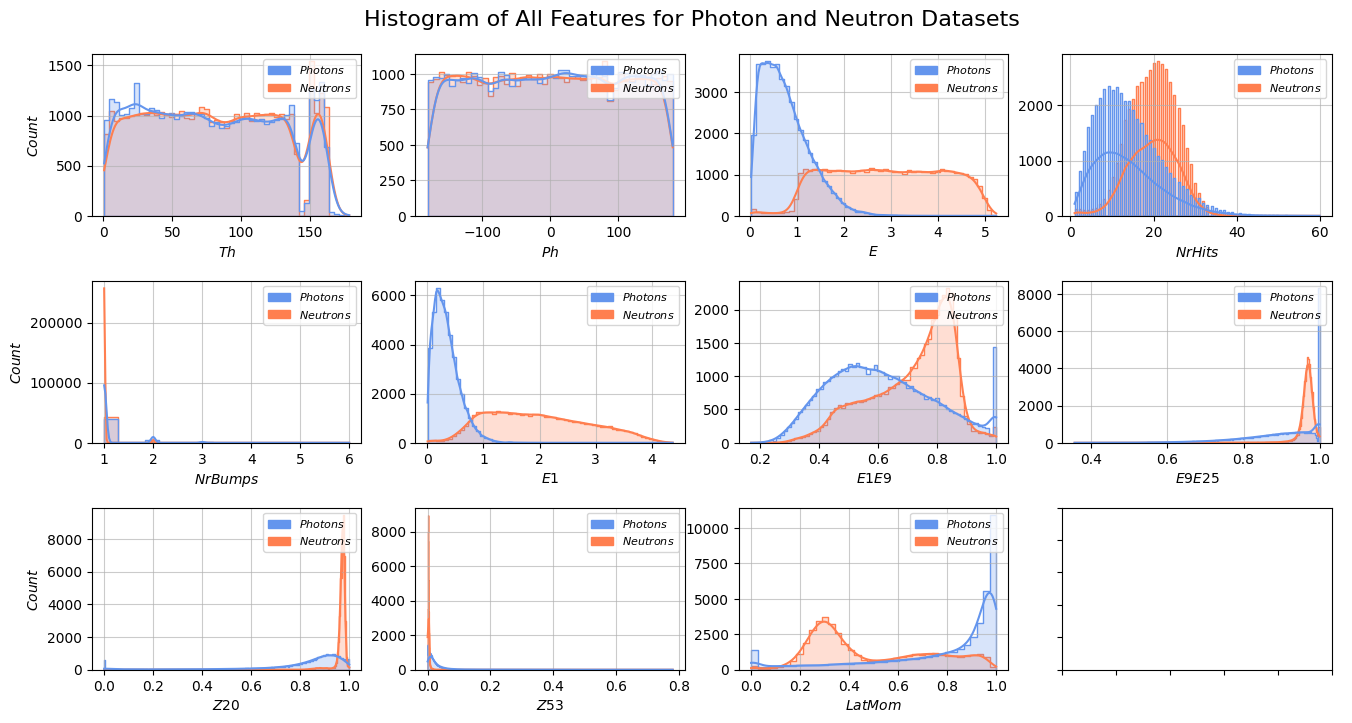

In [ ]:
import seaborn as sns

##########
########## SETUP
##########

    # Names of the features
feature_names = [col for col in dataset_p.columns]

    # Custom colours and legend items
p_col_dist = 'cornflowerblue'       # For photons data
n_col_dist = 'coral'                # For neutrons data
custom_palette = sns.set_palette(sns.color_palette([p_col_dist, n_col_dist]))
custom_legend_elements = [
    Patch(label = "$\mathit{Photons}$", facecolor = p_col_dist, edgecolor = p_col_dist),
    Patch(label = "$\mathit{Neutrons}$", facecolor = n_col_dist, edgecolor = n_col_dist),
]

    # Creates a figure of 3 x 4 histograms (11 total features)
n_rows = 3
n_cols = 4
plt.subplots(
    nrows = n_rows, ncols = n_cols, figsize=(16,8)
)
plt.suptitle(
    "Histogram of All Features for Photon and Neutron Datasets",
    y=0.935, fontsize=16
)
plt.rc('axes', axisbelow=True)

##########
########## HISTOGRAM SUBFIGURES
##########

    # Create the double-histogram subplots
subplot = 1
for feature in feature_names:
        # Subplot setup and spacing
    plt.subplots_adjust(wspace=0.2, hspace = 0.4)
    plt.subplot(n_rows, n_cols, subplot)
    plt.grid(True, alpha = 0.65)

        # Combines proton and neutron data for simultaneous visualization
    comb_dict = {
        'Photon': dataset_p.get(feature),
        'Neutron': dataset_n.get(feature)
    }
    comb_col = pd.DataFrame(data = comb_dict)

        # Plots photon and neutron data together for current feature
    ax = sns.histplot(data = comb_col, kde = True, palette = custom_palette, element = "step")
    ax.set(
        xlabel = "$\mathit{" + feature + "}$",
        ylabel = "$\mathit{Count}$" if subplot % n_cols == 1 else '',
    )

        # Setup custom legend
    plt.legend(handles = custom_legend_elements, loc = "upper right", fontsize = 8)

    subplot += 1

    # Empty all remaining subplots, as there is no information displayed
while subplot <= n_rows * n_cols:
    plt.subplot(n_rows, n_cols, subplot)
    plt.grid(False)
    plt.xticks(color='w')
    plt.yticks(color='w')
    subplot += 1

### Discussion

The provided code generates histograms for each feature in the photon and neutron datasets, allowing us to visualize the distribution of these features and compare the two datasets.

**Feature Distribution**:
   - The histograms show the distribution of each feature for both photons and neutrons. In some cases, features exhibit clear separability between photons and neutrons. For example, the feature "..." shows distinct peaks for photons and neutrons, indicating good potential for classification. On the other hand, some features, such as "..." and "..." have overlapping distributions, making it challenging to distinguish between photons and neutrons based solely on those features.

   Nevertheless, it is important to keep in mind that features that share a correlation may skew the obtained results of the model despite appearing to be distinguishable in these histograms. Such correlations will be discussed and evaluated later on.

## B. Scatterplot Correlations

The following code creates a scatterplot of all features against a choice `selected_feature`, with both the photon and neutron data. This allows us to uncover more information about relationships between the features, distributions, and relevant correlations.

In [ ]:
def scatterplot_all_against(selected_feature, p_col = p_col_dist, n_col = n_col_dist):
    ##########
    ########## SETUP
    ##########

        # Raise error for incorrect usage
    if selected_feature not in feature_names:
        raise ValueError(f"Value '{selected_feature}' not a valid feature. Please choose between: {feature_names}")

        # Create figure of 3 x 4 subplots (10 features against selected)
    n_rows = 3
    n_cols = 4
    plt.subplots(
        nrows = n_rows, ncols = n_cols, figsize=(16,10),
        sharey = 'all'
    )
    plt.suptitle(
        "Scatterplots of Different Features Against '$\mathit{" + selected_feature + "}$\'",
        y=0.935, fontsize=16
    )
    plt.rc('axes', axisbelow=True)

    ##########
    ########## SCATTERPLOT SUBFIGURES
    ##########

    subplot = 1
    for feature in feature_names:
            # Skip selected feature
        if feature == selected_feature:
            continue

            # Subplot setup
        plt.subplots_adjust(wspace=0.1, hspace = 0.3 if subplot >= n_cols else 0)
        plt.subplot(n_rows, n_cols, subplot)
        plt.grid(True, alpha = 0.65)

            # Set axis labels
        plt.ylabel("$\mathit{" + selected_feature + "}$" if subplot % n_cols == 1 else "", fontsize = 13)
        plt.xlabel("$\mathit{" + feature + "}$", fontsize = 13)

            # Plot photon data
        plt.scatter(
            dataset_p.get(feature),
            dataset_p.get(selected_feature),
            label = "Photons",
            s = 0.1, c = p_col
        )
            # Plot neutron data
        plt.scatter(
            dataset_n.get(feature),
            dataset_n.get(selected_feature),
            label = "Neutrons",
            s = 0.1, c = n_col
        )

            # Setup custom legend
        plt.legend(handles = custom_legend_elements, loc = "upper right", fontsize = 8)

        subplot += 1

        # Empty all remaining subplots, as there is no information displayed
    while subplot <= n_rows * n_cols:
        plt.subplot(n_rows, n_cols, subplot)
        plt.grid(False)
        plt.xticks(color = 'w')
        subplot += 1

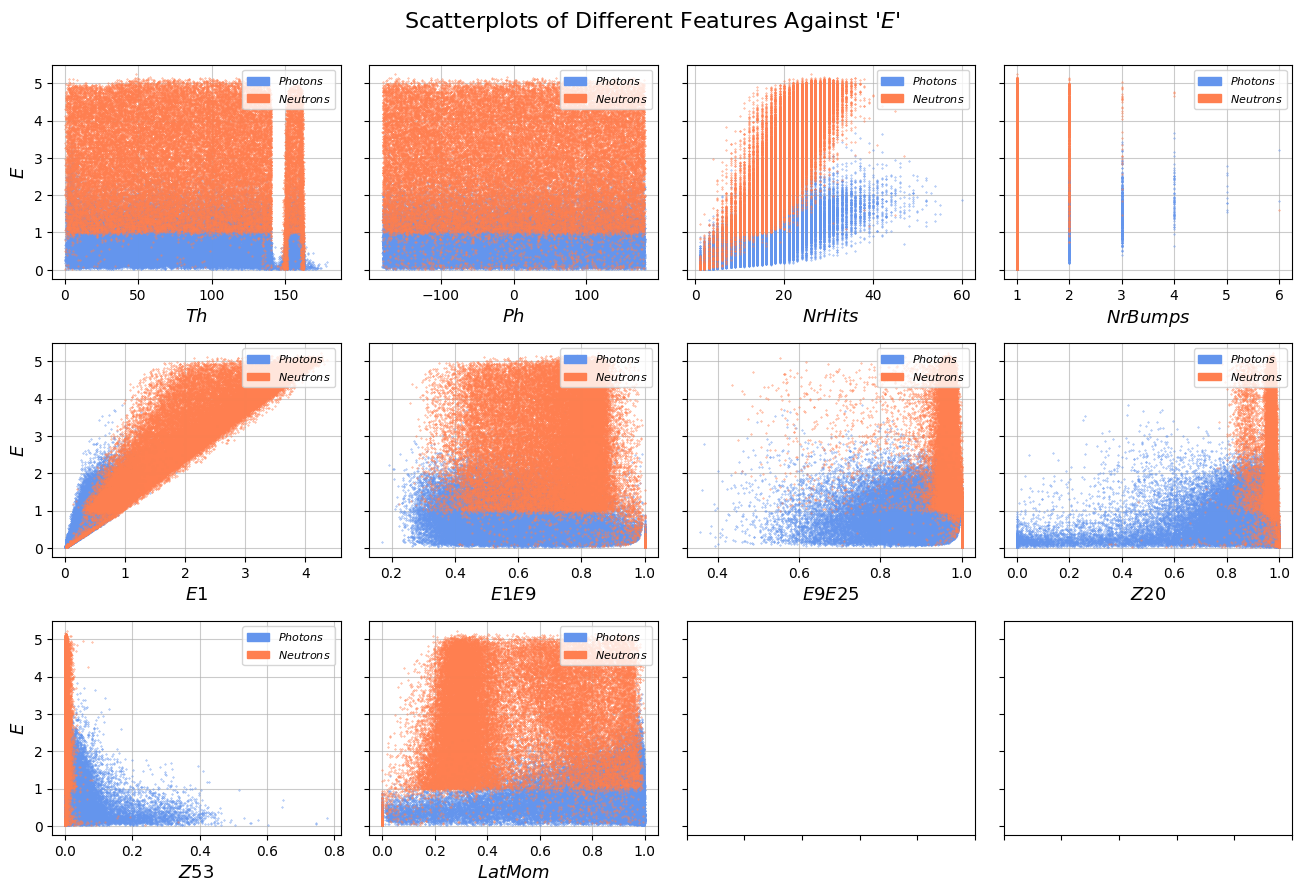

In [ ]:
scatterplot_all_against('E')

### Discussion

The provided code generates, for each feature, a graph using the data in the photon and neutron datasets. This allows us to visualize the behaviour of these features on the datasets and compare them.
<br>
What immediately catches the eye is the significant variation among the plots. Certain features, such as NrHits and NrBumps, yield sharply defined graphs, whereas others like LatMom and E1E9 result in less organized and more scattered patterns, as not all features are continuous and they have different ranges.

## C. Correlation Matrices

The Pandas library offers easy access to the correlation matrix of a dataset through the DataFrame class. This allows for the visualization of which features are correlated with the others strongly, and represents an easier way to assess relationships between variables than the many scatterplots at the previous subsection.

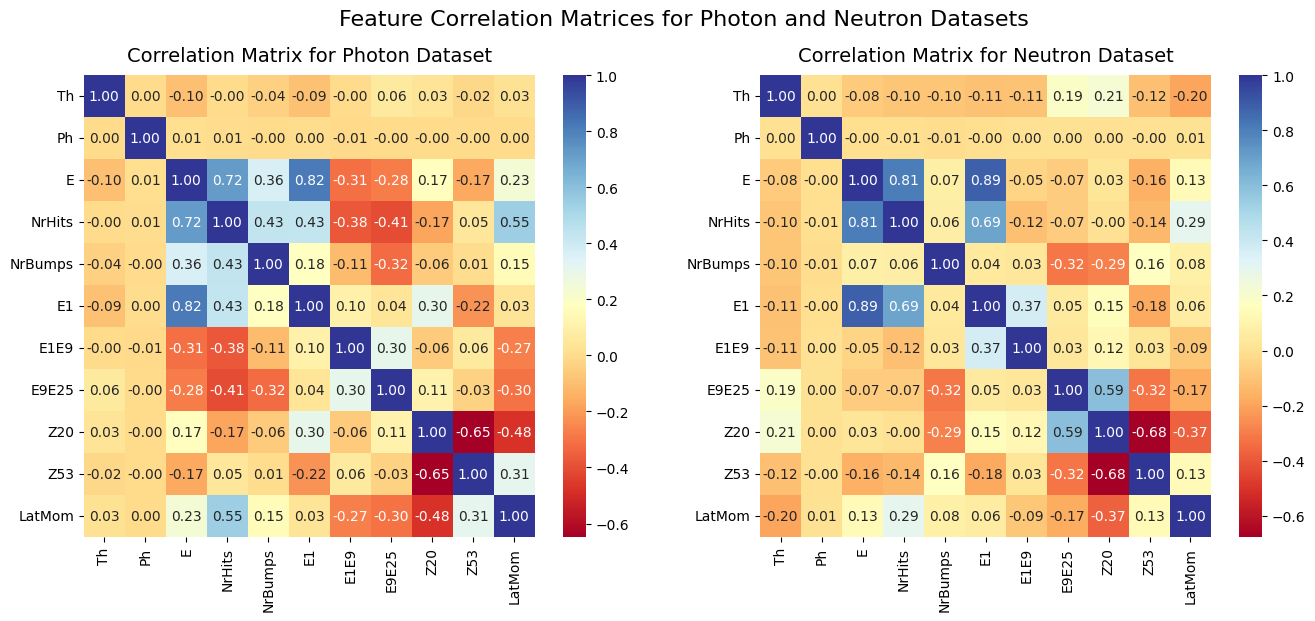

In [ ]:
    # Create figure of 2 subplots
plt.subplots(
    nrows = 1, ncols = 2, figsize=(16,6)
)
plt.suptitle(
    "Feature Correlation Matrices for Photon and Neutron Datasets",
    y=0.99, fontsize=16
)

    # Create Photon Dataset correlation matrix
plt.subplots_adjust(wspace=0.2)
plt.subplot(1, 2, 1)
plt.title("Correlation Matrix for Photon Dataset", y = 1.013, fontsize = 14)
dataplot = sns.heatmap(dataset_p.corr(), fmt='.2f', cmap='RdYlBu', annot=True)

    # Create Neutron Dataset correlation matrix
plt.subplots_adjust(wspace=0.2)
plt.subplot(1, 2, 2)
plt.title("Correlation Matrix for Neutron Dataset", y = 1.013, fontsize = 14)
dataplot = sns.heatmap(dataset_n.corr(), fmt='.2f', cmap='RdYlBu', annot=True)

plt.show()

### Discussion

The pair of heatmaps illustrate the extent of correlation between different features. Consequently, it is entirely logical, and indeed, mandatory, that features intersecting along the diagonal in this matrix exhibit a perfect correlation, as they represent the same feature.
<br>
Apart from the general interpretation, there isn't much to add, except that certain combinations display a strong positive correlation, such as NrHits and E in the neutron dataset (0.81), while others demonstrate a notably strong negative correlation, like Z20 and LatMom in the photon dataset (-0.48).
<br>
Lastly we can also say that both heatmaps show quite similar correlation matrices. The difference obviously is the used dataset, but this only affected the values within the matrices slightly.
<br>
These correlation matrices also neatly summarize the messy scatterplots created at 'B', providing a single number for a good indication whether a feature is (at least linearly) dependent on another.

## D. Powerful Features and Differences Between Datasets

The features chosen to be used for our model based on these results are E, LatMom, Z53, NrBumps and E1E9. More specifically, these features were selected such that their distinguishability (between photons and neutrons) is maximized while the correlations between the features is minimized.


# 3. Machine Learning Environment Setup

## A. The Model Picker

The selected model will run on the dataset of combined photon and neutron event observations. This is an annotated dataset which corresponds to supervised machine learning methods, as the different observations in the final dataset will be verifiable after attempted classification. Data points will be of the form $(X_i, y_i)$, where $X_i$ are the observed features of the $i$th event, and $y_i$ is the correct class of the $i$th event.

The following code is used to get a model which uses the specified hyperparameters. No method to verify hyperparameter correctness was implemented, and we assume that the function is used appropriately when the classifier type is chosen correctly. If the default hyperparameters should be used, the `use_hp` parameter should explicitly be set to `False` (for example when using the later implemented Grid Search for hyperparameter optimization).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

def get_model(model_type, hyperparameters, use_hp = True):
        # Define model based on choice
    if model_type == 'kNN':
        """ ----- K NEAREST NEIGHBORS CLASSIFIER -----
        hyperparameters[0] -> n_neighbours: how many neighbours are taken for a single observation
        hyperparameters[1] -> p           : power of metric (for Euclidian distance use 2)
        """
        return KNeighborsClassifier(
            n_neighbors = hyperparameters[0],
            p = hyperparameters[1],
            weights = 'distance',
            algorithm = 'auto'
        ) if use_hp else KNeighborsClassifier(
            weights = 'distance',
            algorithm = 'auto'
        )

    elif model_type == 'RF':
        """ ----- RANDOM FOREST CLASSIFIER -----
        hyperparameters[0] -> n_estimators: how many trees are used in the random forest
        hyperparameters[1] -> max_depth   : maximum depth of the tree (for unlimited use None)
        hyperparameters[2] -> max_features: how many features to consider when splitting
            can use "sqrt" or "log2" (of n features passed), integers, ...
        """
        return RandomForestClassifier(
            n_estimators = hyperparameters[0],
            max_depth = hyperparameters[1],
            max_features = hyperparameters[2],
            criterion = 'gini',
            bootstrap = False
        ) if use_hp else RandomForestClassifier(
            criterion = 'gini',
            bootstrap = False
        )
    elif model_type == 'MLP':
        """ ----- MULTI LAYER PERCEPTRON -----
        hyperparameters[0] -> hidden_layer_sizes: array of sizes of the hidden layers

        """
        return MLPClassifier(
            hidden_layer_sizes = hyperparameters[0],
            solver = 'sgd',
            activation = 'logistic'
        ) if use_hp else MLPClassifier(
            solver = 'sgd',
            activation = 'logistic'
        )
    else:
        raise ValueError(f"Model type '{model_type}' not an available model. Please choose between: 'kNN', 'RF', 'MLP'")

The classification is done by the following function, which takes in a model determined through the code above, as well as a dataset and a training-validation split to be used for the data. The return value is a modified data set containing predicted values for both the training and testing sets, which can later be used for performance evaluations.

The feature selection is not done within this function, we assume more complex evaluations will require repeated runs of the classification code. Feature extraction will be done on the dataset before it is passed as a parameter, for increasing computation efficiency.

The function `get_split` uses the sklearn `test_train_split` facility to easily create new new training and validation sets from random splits.

In [ ]:
from sklearn.model_selection import train_test_split

def get_split(dataset, split = 0.5):
        # Split data into training and validation sets
    X = dataset.drop("EventType", axis = 1)  # Select features without label
    y = dataset.get("EventType")             # Labels
    return train_test_split(X, y, test_size = split)

def classify(model, dataset, split = 0.5):
        # Split training and validation data
    X_train, X_test, y_train, y_test = get_split(full_dataset, split = split)

        # Fit model to training data
    model.fit(X_train, y_train)

        # Make predictions and update dataset
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    y_true = np.concatenate((y_train, y_test))
    y_pred = np.concatenate((y_pred_train, y_pred_test))
    is_train = np.concatenate((np.ones(y_pred_train.shape[0], dtype = int), np.zeros(y_pred_test.shape[0], dtype = int)))

    return pd.DataFrame(data = {
        "True": y_true, "Pred": y_pred, "IsTrain": is_train
    })

## B. The FOM Metric

The FOM (figure-of-merit) metric is defined by $\displaystyle \mathit{FOM} = \frac{s}{\sqrt{s + b}}$, where $s$ is the number photon events (_selected_ events) and $b$ is the number of neutron events (_background_ events) following classification. Therefore, a Machine Learning algorithm on the provided datasets will classify photon and neutron clusters, seeking to minimize the FOM ratio.

Minimization of the FOM metric corresponds to maximizing the number of background events correctly classified by the algorithm. By correctly detecting as many neutron clusters as possible, the noise in the data is reduced to where photonic events can be separated correctly, which is needed for the procedure to be useful in the analysis of the data.

Possible performance improvements could be made by using vectorized functions such as those in the `numpy` library, but this did not prove necessary for the scope of this project.

In [ ]:
def fom(y_true, y_pred):
    """
    Computes FOM metric by comparing the array of true labels to the array of predicted labels.
    s = correctly identified AND class is 0 <-> photon event
    b = correctly identified AND class is 1 <-> neutron event
    """
    if y_true.shape != y_pred.shape:
        raise ValueError("Incorrect label array sizes")

    s = 0
    b = 0
    for tr, pr in zip(y_true, y_pred):
        if tr == pr:
            if tr == 0:
                s += 1
            else:
                b += 1

    return s / np.sqrt(s + b)

## C. The Output

The code below defines evaluation metrics for the machine learning algorithms used, and defines a function for determining the metrics for a single classification following a call to `classify`.

The evaluation metrics used are:
1. Accuracy -- the general metric for determining a percentage of correct classifications that were made;
2. Precision -- the proportion of true positives in the dataset out of all positive classifications by the model;
3. Recall -- the proportion of true positives in the dataset that was correctly identified by the model;
4. The FOM metric

The validity of the Accuracy metric alone is questionable in many classification tasks. For example, a dataset where there are 5% photon events and 95% neutron events would easily be 'learned' to 95% classification accuracy by a model that always classifies the event as a neutron event. Thus, Precision and Recall were also added.

Precision and Recall also do not give a complete picture of the classifier's performance on their own, and it is easy to make inaccurate assessments without both. A balanced option is the F1 score, however that was not added for simplicity (and having both P+R allows for more in-depth analysis).

**_(Keep in mind, 'positive classifications' refers to the neutron events, as those are the classification target.)_**

The function `evaluate_results` takes as a parameter the dataframe returned by `classify` and computes the evaluation metrics for that data, returning a dictionary of values (in the same way sklearn does by default in functions implemented in the next blocks).

The function `cv_model` is just an alias for the sklearn `cross_validate` used to iterate over _k_ folds of the training data (the final testing has to be done separately if this function is used). It applies _k_-fold cross-validation on a model with already-set hyperparameters, returning a dictionary of evaluation metrics for each of the folds. For code organization reasons like described earlier, the function takes X_train and y_train as parameters instead of the full dataset, no feature extraction.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

    # Define evaluation functions: accuracy, precision, recall, fom
scorings_rawfuncs = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'figure-of-merit': fom
}

    # Define evaluation metrics: accuracy, precision, recall, fom
scorings = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'figure-of-merit': make_scorer(fom, greater_is_better = False)
}

def evaluate_results(res_dataframe):
        # Apply each scoring function to the true and predicted data, add to a dict
    evdict = {}

        # Training evaluation
    train = res_dataframe[(res_dataframe["IsTrain"] == 1)]
    for scoring in scorings_rawfuncs.keys():
        evdict["train_" + scoring] = scorings_rawfuncs[scoring](y_true = train["True"], y_pred = train["Pred"])

        # Testing evaluation
    test = res_dataframe[(res_dataframe["IsTrain"] == 0)]
    for scoring in scorings_rawfuncs.keys():
        evdict["test_" + scoring] = scorings_rawfuncs[scoring](y_true = test["True"], y_pred = test["Pred"])

    return evdict

    # Cross validation
def cv_model(model, X_train, y_train, k_folds):
    return cross_validate(model, X_train, y_train, cv = k_folds, scoring = scorings)

# 4. Model Training

## A. The Dataset

The `normalize` function scales all columns of a dataset to the $[0, 1]$ range using $\min$-$\max$ scaling.

The `combine` function takes in an array of datasets. It normalizes each element and adds an `"EventType"` label ($0$ for photon events, $1$ for neutron events - the classification target). It combines the labeled sets into one, then shuffles it so that the classes are randomly arranged.

The `subset` function is used for feature selection. It takes in a _labeled_ dataset and a list of desired features. All features not in that list are dropped, except for the `"EventType"` required for classification.

In [ ]:
def normalize(dataset):
        # Copy dataset
    normalized_dataset = dataset.copy(deep = True)

        # Scale all columns to [0, 1] range
    for column in normalized_dataset.columns:
        normalized_dataset[column] = (normalized_dataset[column] - normalized_dataset[column].min()) / (normalized_dataset[column].max() - normalized_dataset[column].min())

    return normalized_dataset

def combine(datasets):
        # Label normalized proton dataset
    dataset_p_labeled = normalize(datasets[0])
    dataset_p_labeled.insert(loc = 0, column = "EventType", value = 0, allow_duplicates = True)

        # Label normalized neutron dataset
    dataset_n_labeled = normalize(datasets[1])
    dataset_n_labeled.insert(loc = 0, column = "EventType", value = 1, allow_duplicates = True)

        # Join datasets and shuffle (by sampling)
    dataset = pd.concat([dataset_p_labeled, dataset_n_labeled]).sample(frac = 1, replace = False, ignore_index = True)

    return dataset

def subset(dataset, selected_features):
    to_drop = [feat for feat in dataset.columns if feat not in selected_features and feat != "EventType"]

    return dataset.drop(labels = to_drop, axis = 1)

full_dataset = combine([dataset_p, dataset_n])

In [ ]:
selected_features = ['E', 'LatMom', 'Z53', 'NrBumps', 'E1E9']
reduced_dataset = subset(full_dataset, selected_features)

## B. Test Runs

In [ ]:
X_train, X_test, y_train, y_test = get_split(reduced_dataset, split = 0.5)

#####
##### kNN
#####
kNN_model = get_model('kNN', [20, 1])

out = classify(kNN_model, reduced_dataset, split = 0.5)
print("kNN attempt:\n\t", evaluate_results(out))

out = cv_model(kNN_model, X_train, y_train, k_folds = 2)
print("kNN 2-fold CV:\n\t", out)

#####
##### RF
#####
RF_model = get_model('RF', [3, 2, "log2"])

out = classify(RF_model, reduced_dataset, split = 0.5)
print("RF attempt:\n\t", evaluate_results(out))

out = cv_model(RF_model, X_train, y_train, k_folds = 2)
print("RF 2-fold CV:\n\t", out)

#####
##### MLP
#####
MLP_model = get_model('MLP', [[6, 6, 4, 2]])

out = classify(RF_model, reduced_dataset, split = 0.5)
print("MLP attempt:\n\t", evaluate_results(out))

out = cv_model(MLP_model, X_train, y_train, k_folds = 2)
print("MLP 2-fold CV:\n\t", out)

kNN attempt:
	 {'train_accuracy': 1.0, 'train_precision': 1.0, 'train_recall': 1.0, 'train_figure-of-merit': 104.57118617121014, 'test_accuracy': 0.9709918040335206, 'test_precision': 0.9666940414271376, 'test_recall': 0.9755962795837554, 'test_figure-of-merit': 102.19705035699023}
kNN 2-fold CV:
	 {'fit_time': array([0.01642919, 0.01635695]), 'score_time': array([0.26826715, 0.25289702]), 'test_accuracy': array([0.89930012, 0.9064831 ]), 'test_precision': array([0.88286296, 0.88899682]), 'test_recall': array([0.92040214, 0.92860437]), 'test_figure-of-merit': array([-68.34898566, -68.5622879 ])}
RF attempt:
	 {'train_accuracy': 0.881803112625472, 'train_precision': 0.9393179270961199, 'train_recall': 0.8149279992591564, 'train_figure-of-merit': 105.77951666505743, 'test_accuracy': 0.8812275531816927, 'test_precision': 0.9407985558033344, 'test_recall': 0.8141800303267013, 'test_figure-of-merit': 105.07802845085571}
RF 2-fold CV:
	 {'fit_time': array([0.05187416, 0.05117393]), 'score_ti

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP 2-fold CV:
	 {'fit_time': array([1.53236628, 1.39552689]), 'score_time': array([0.12109113, 0.23088574]), 'test_accuracy': array([0.50078276, 0.50082881]), 'test_precision': array([0., 0.]), 'test_recall': array([0., 0.]), 'test_figure-of-merit': array([-104.2880626, -104.2928569])}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## D. Hyperparameter Optimization

The code below is a setup for the cross-validation and hyperparameter tuning steps of the machine learning development. It was modified to also use the FOM metric, as minimizing this metric is the main objective of the training procedure. The classes and methods available in sklearn were used for this, following a manual implementation of the functionalities that turned out to be redundant. More explanations on how the code works are provided in the later sections. The same assumptions about feature extraction hold as for the previous code blocks.

The function `grid_search` applies the Grid Search algorithm as provided by the sklearn library. It takes in a model name (kNN, RF, etc.), a dictionary of hyperparameters to optimize between, and training data. The fitting procedure for the Grid Search performs an exhaustive search through all combinations of hyperparameters in the provided `hyperparam_space` dictionary and returns a fitted model, which contains evaluation metrics for each attempt.

Aside from single evaluations of the model, the Grid Search implementation also uses _k_-fold cross validation during the training of each algorithm. The _k_ is controlled by the `folds` parameter of the function.

(More details available on https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
from sklearn.model_selection import GridSearchCV

    # Grid search fitting
def grid_search(model, hyperparam_space, X_train, y_train, folds=3):
    """
        verbosity (integer) controls level of detail in output
        default = 1: not many details
               >= 4: very explicit
    """
        # Define evaluation metrics: accuracy, precision, fom
    scorings = {
        'accuracy': make_scorer(accuracy_score),
        'precision': 'precision',
        'recall': 'recall',
        'figure-of-merit': make_scorer(fom, greater_is_better = False)
    }

        # Create grid search model
    clf = GridSearchCV(
        get_model(model, [], False),
        hyperparam_space,
        scoring = scorings,
        verbose = 2,
        refit = 'figure-of-merit',
        n_jobs = -1,     # use all processors for training
        cv = folds       # use 3-fold CV to get results
    )

        # Fit model to data
    clf.fit(X_train, y_train)

        # Return fitted model
    return clf

The two functions below were created for easier use in actual training examples.

The function `filter_results` takes the data of the fitted Grid Search model and filters it for easy display. This selects only the mean and standard deviation columns for each metric, along with the corresponding hyperparameter combination that yields them.

The function `gs_and_interpret` takes in a model name together with a hyperparameter space and (pre-processed) dataset. It performs all necessary processing: Grid Search is performed n the training data, then the best model is validated using the FOM metric on the testing set.

In [ ]:
def filter_results(gs_res, hyperparameters):
        # Only display useful summary results of the GS
    gs_res_df = pd.DataFrame(gs_res.cv_results_)
    gs_res_df["mean_test_figure-of-merit"] *= -1
    gs_res_df = gs_res_df.drop(
        [col for col in gs_res_df.columns if (
            ((col != "params") and ("mean" not in col and "std" not in col)) or "time" in col
        )],
        axis = 1
    ).sort_values("mean_test_figure-of-merit", ignore_index = True)

    param = 0
    for name in list(hyperparameters.keys()):
        gs_res_df.insert(loc = param, column = name, value = [
            data["params"][name] for index, data in gs_res_df.iterrows()
        ])
        param += 1

    gs_res_df = gs_res_df.drop("params", axis = 1)

    return gs_res_df

def gs_and_interpret(model_name, hyperparameters, dataset, split=0.5, folds=3):
        # Split data into training and validation sets
    X_train, X_test, y_train, y_test = get_split(dataset, split = split)

        # Perform grid search and get results
    gs_res = grid_search(model_name, hyperparameters, X_train, y_train, folds)

        # Evaluate FOM on test set with best parameters
    test_eval_fom = fom(y_test, gs_res.predict(X_test))

    return test_eval_fom, filter_results(gs_res, hyperparameters)

The following function is used to plot the results of the Grid Search. This is useful when a hyperparameter is given many possible values to fit for, as it allows for easier visualization of which values minimize the FOM.

`param` is the parameter to be plotted on the _x_-axis, `hyperparameters` is the same dictionary that was given to the Grid Search, and `other_values` is a dictionary similar to the hyperparameters which specifies a single value for each non-plotted parameter that should be used when plotting the FOM.

In [ ]:
from matplotlib import pyplot as plt

def plot_fom_for(param, hyperparameters, other_values, df):
    plt.figure()
    title_var = param.replace("_", "\_")
    plt.title(f"Figure of Merit for different $\\mathit{{{ title_var }}}$")

    plt.xlabel(f"$\\mathit{{{ title_var }}}$")
    plt.ylabel("FOM evaluation")
    plt.xticks()

    plt.grid(True)

    x_vals = hyperparameters[param]
    y_vals = df

    for key in list(hyperparameters.keys()):
        if key != param:
            y_vals = y_vals.query(f'{key} == {other_values[key]}')
    y_vals = y_vals.sort_values(by = param, ignore_index = True)["mean_test_figure-of-merit"]

    plt.plot(x_vals, y_vals)
    plt.show()

## Using Grid Search on the Models

Here are some of the "project-wide" macros that can be modified for different results.

`test_size` is the percentage used when splitting the data into training and testing sets.

`cv_folds` controls the number of cross-validation repetitions of the Grid Search algorithm.

In [ ]:
    # Used for all examples
test_size = 0.5
cv_folds = 5

### k-Nearest Neighbours

The code below uses Grid Search to determine the best hyperparameters for kNN from the `hyperparameter_space` list. The values for `n_neighbours` were chosen in the specified range such that both overfit and underfit cases are considered, and the Grid Search can later be modified towards smaller and denser ranges once a rough estimate for the ideal hyperparameter is made. The values for the `p` parameter were chosen as 1 and 2 in order to consider more than one possibility for the metric of the sample space, as the validity of the Euclidian distance metric is not certain for the available features.

After the GSCV model is trained, the following code block sorts the results and evaluates the model using the best hyperparameters _with respect to the FOM metric_.

From the final evaluation on the test set, it seems that the kNN implementation has a twice higher test FOM than the best fit trainining FOM, which is highly indicative of overfitting. This might be due to the very large training-validation split of 50%, which is nonstandard in Machine Learning applications (especially if k-fold cross validation is heavily used on hyperparameter fitting over the same training data repeatedly).

In [ ]:
    # Define search space
hyperparam_space_kNN = {
    'n_neighbors': np.concatenate([np.arange(5, 50, 15), np.arange(50, 400, 50)]),
    'p': [1, 2]
}
print(hyperparam_space_kNN)

testfom_kNN, filtered_df_kNN = gs_and_interpret('kNN', hyperparam_space_kNN, reduced_dataset, split = test_size, folds = cv_folds)

{'n_neighbors': array([  5,  20,  35,  50, 100, 150, 200, 250, 300, 350]), 'p': [1, 2]}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
    # Train vs validation FOM. Full Grid Search results
print( "FOM (train): {:.3f}\nFOM (valid): {:.3f}".format(filtered_df_kNN["mean_test_figure-of-merit"][0], testfom_kNN) )
filtered_df_kNN.head()

FOM (train): 43.299
FOM (valid): 97.031


,n_neighbors,p,mean_test_accuracy,std_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall,mean_test_figure-of-merit,std_test_figure-of-merit
0,35,1,0.902823,0.001997,0.885102,0.001986,0.925257,0.005458,43.299231,0.156654
1,50,1,0.899369,0.001681,0.883253,0.002614,0.919810,0.005496,43.309852,0.190910
2,35,2,0.904043,0.001728,0.885991,0.002711,0.926873,0.005454,43.310590,0.191815
3,20,1,0.908440,0.001203,0.888576,0.002525,0.933475,0.005167,43.313704,0.189277
4,20,2,0.909568,0.001868,0.889460,0.002235,0.934860,0.005678,43.329624,0.175892


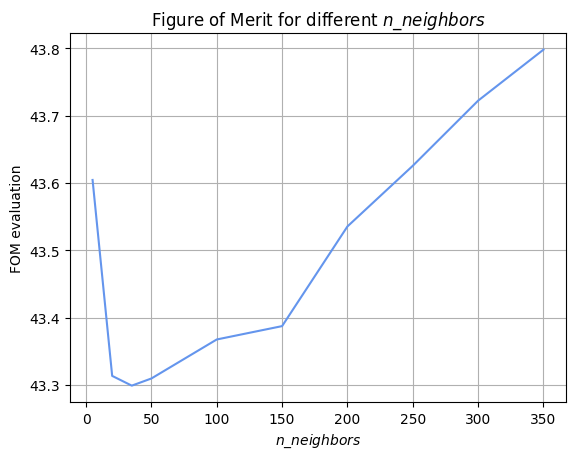

In [ ]:
    # Define plot variables
non_plot_kNN = {
    'p': 1
}
plot_fom_for('n_neighbors', hyperparam_space_kNN, non_plot_kNN, filtered_df_kNN)

### Random Forest

The same procedure is given below as for the previous subsection on kNN.

`n_estimators` was given values that span over a large range to cover as many possibilities. `max_features` was left with less options, as the pre-processed dataset has much less than 11 features. The `max_depth` parameter was given small values, along with `None` ('keep going regardless of depth').

RF turns out to be significantly more time-consuming to train even for less total fits, so maybe don't try too many at once unless you have a lot of computing power or you're going for lunch.

**_(Keep in mind, using "sqrt" or "log" for max_features might result in undefined behaviour when ploting, as well as using None for max_depth.)_**

In [ ]:
    # Define search space
hyperparam_space_RF = {
    'n_estimators': [10, 30, 50, 100, 200],
    'max_depth': [1, 3, None],
    'max_features': [2, 3]
}
print(hyperparam_space_RF)

testfom_RF, filtered_df_RF = gs_and_interpret('RF', hyperparam_space_RF, reduced_dataset, split = test_size, folds = cv_folds)

{'n_estimators': [10, 30, 50, 100, 200], 'max_depth': [1, 3, None], 'max_features': [2, 3]}
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
    # Train vs validation FOM. Full Grid Search results
print( "FOM (train): {:.3f}\nFOM (valid): {:.3f}".format(filtered_df_RF["mean_test_figure-of-merit"][0], testfom_RF) )
filtered_df_RF.head()

FOM (train): 43.688
FOM (valid): 98.066


,n_estimators,max_depth,max_features,mean_test_accuracy,std_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall,mean_test_figure-of-merit,std_test_figure-of-merit
0,100,NaN,3,0.881481,0.003001,0.879254,0.002429,0.884037,0.004865,43.687635,0.095547
1,200,NaN,3,0.881780,0.002632,0.879854,0.002660,0.883945,0.004613,43.714477,0.127796
2,50,NaN,3,0.881918,0.002949,0.879950,0.001657,0.884130,0.005862,43.715743,0.102410
3,30,NaN,3,0.881320,0.002625,0.879919,0.002642,0.882793,0.004788,43.737333,0.133160
4,10,1.0,2,0.842826,0.003381,0.857005,0.014143,0.823081,0.015169,43.842893,0.874877


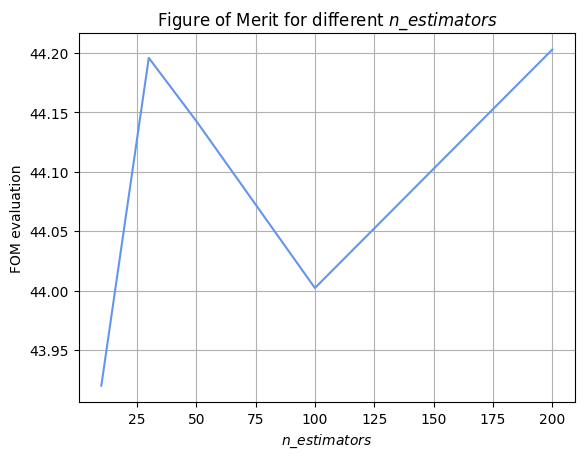

In [ ]:
    # Define plot variables
non_plot_RF = {
    'max_depth': 3,
    'max_features': 2
}
plot_fom_for('n_estimators', hyperparam_space_RF, non_plot_RF, filtered_df_RF)

### Multi Layer Perceptron

The same procedure. The hidden layer sizes arrays were chosen manually in this way so that it is clear what number of layers and what respective sizes are most efficient for classification.

In [ ]:
    # Define search space
hyperparam_space_MLP = {
    'hidden_layer_sizes': [
        [8, 6],
        [8, 6, 4],
        [6, 4, 2],
        [6, 6, 4, 2],
        [6, 4, 4, 2]
    ]
}
print(hyperparam_space_MLP)

testfom_MLP, filtered_df_MLP = gs_and_interpret('MLP', hyperparam_space_MLP, reduced_dataset, split = test_size, folds = cv_folds)

{'hidden_layer_sizes': [[8, 6], [8, 6, 4], [6, 4, 2], [6, 6, 4, 2], [6, 4, 4, 2]]}
Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
    # Train vs validation FOM. Full Grid Search results
print( "FOM (train): {:.3f}\nFOM (valid): {:.3f}".format(filtered_df_MLP["mean_test_figure-of-merit"][0], testfom_MLP) )
filtered_df_MLP.head()

FOM (train): 44.060
FOM (valid): 100.178


,hidden_layer_sizes,mean_test_accuracy,std_test_accuracy,mean_test_precision,std_test_precision,mean_test_recall,std_test_recall,mean_test_figure-of-merit,std_test_figure-of-merit
0,"[6, 6, 4, 2]",0.852173,0.002233,0.866721,0.006145,0.832181,0.005853,44.060357,0.344338
1,"[8, 6, 4]",0.851276,0.004325,0.869175,0.006401,0.826836,0.005953,44.262626,0.287245
2,"[6, 4, 4, 2]",0.852565,0.004399,0.870942,0.004278,0.827621,0.012881,44.320826,0.376616
3,"[6, 4, 2]",0.852220,0.004017,0.870754,0.006074,0.827021,0.005027,44.324099,0.259159
4,"[8, 6]",0.852657,0.004511,0.871090,0.004726,0.827574,0.006007,44.329205,0.159057


# Performance Analysis

## k-Nearest Neighbors

**Performance**: The kNN algorithm is quick to train in the Grid Search procedures. The model was trained on the features chosen in the first section of the project, with results:

**Dimensionality**:

**Over/Underfitting**:

## Random Forest

**Performance**: The Random Forest classifier takes longest to train with the given parameters.

**Dimensionality**:

**Over/Underfitting**:

## Multi-Layer Perceptron

**Performance**:

**Dimensionality**:

**Over/Underfitting**:

# Feature Variations

For this section, other features were chosen and the results are compared to the initial results...

(code)

(analysis)

(comparison with results on initial feature list)

# (Maybe) Principal Component Analysis